## 1. Linear Harmonic Oscillator case

C:\Users\seoyumyum\AppData\Local\Temp\ipykernel_15500\2077400883.py:26: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  coupling = np.sum(Kij[i, j] * np.sin(theta[t, j] - theta[t, i]) for j in range(N))


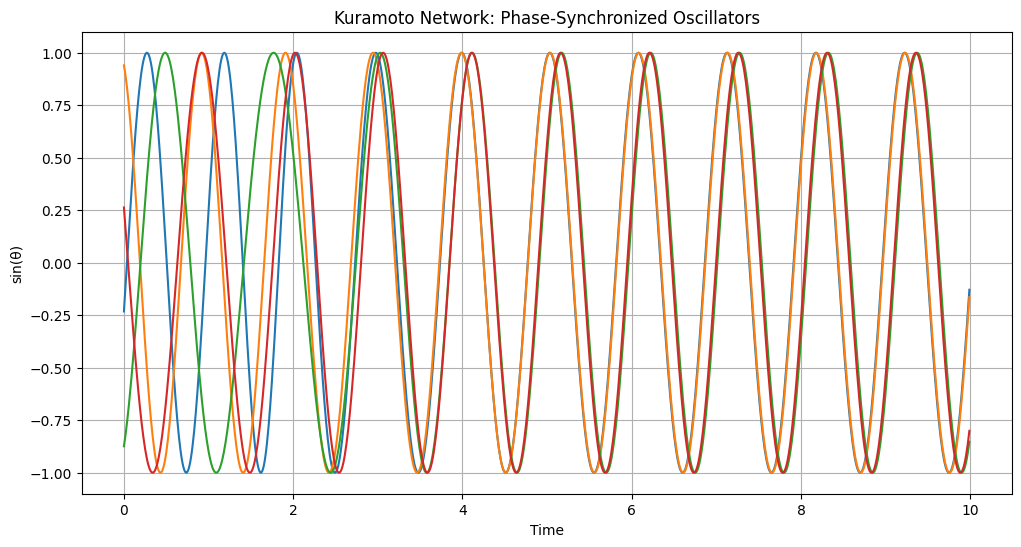

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Number of oscillators
N = 4

# Simulation parameters
T = 10     # total time
dt = 0.01   # time step
steps = int(T / dt)

# Natural frequencies (random)
omega = 2 * np.pi * (1 + 0.1 * np.random.randn(N))

# Coupling matrix (fully connected, equal weights)
K = 1.5
Kij = K / N * (np.ones((N, N)) - np.eye(N))  # no self-coupling

# Initialize phase array
theta = np.random.uniform(0, 2*np.pi, size=(steps, N))

# Time evolution using Kuramoto model
for t in range(steps - 1):
    dtheta = np.zeros(N)
    for i in range(N):
        coupling = np.sum(Kij[i, j] * np.sin(theta[t, j] - theta[t, i]) for j in range(N))
        dtheta[i] = omega[i] + coupling
    theta[t+1] = theta[t] + dtheta * dt

# Convert to sine signals for plotting
signals = np.sin(theta)

# Plot phase evolution
plt.figure(figsize=(12, 6))
for i in range(N):
    plt.plot(np.arange(steps)*dt, signals[:, i], label=f'Oscillator {i+1}')
plt.title('Kuramoto Network: Phase-Synchronized Oscillators')
plt.xlabel('Time')
plt.ylabel('sin(θ)')
plt.grid(True)
plt.show()


C:\Users\seoyumyum\AppData\Local\Temp\ipykernel_15500\140493630.py:27: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  coupling = np.sum(Kij[i, j] * np.sin(theta[t, j] - theta[t, i]) for j in range(N))


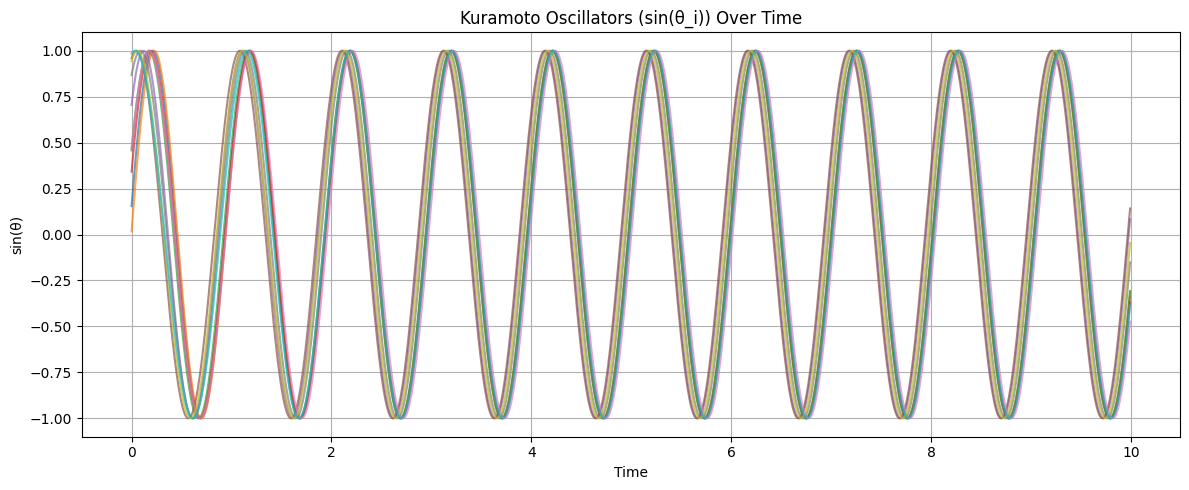

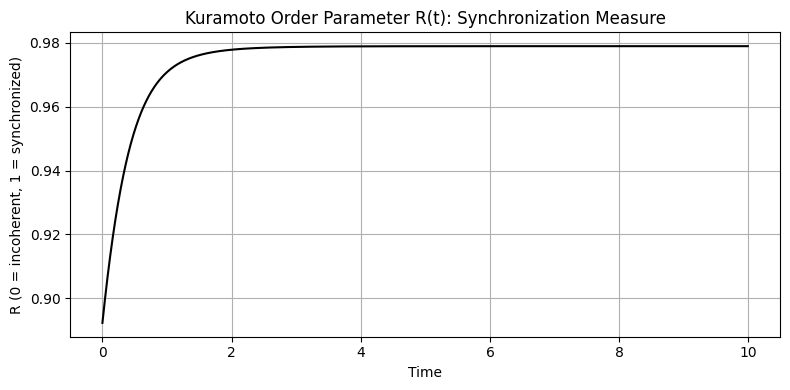

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Number of oscillators
N = 10

# Simulation parameters
T = 10      # total time
dt = 0.01   # time step
steps = int(T / dt)

# Natural frequencies (random but centered)
omega = 2 * np.pi * (1 + 0.05 * np.random.randn(N))

# Coupling strength
K = 1.5
Kij = K / N * (np.ones((N, N)) - np.eye(N))  # fully connected, no self-coupling

# Initial phases (somewhat clustered to encourage synchronization)
theta = np.zeros((steps, N))
theta[0] = np.random.uniform(0, np.pi/2, size=N)

# Time evolution using Kuramoto model
for t in range(steps - 1):
    dtheta = np.zeros(N)
    for i in range(N):
        coupling = np.sum(Kij[i, j] * np.sin(theta[t, j] - theta[t, i]) for j in range(N))
        dtheta[i] = omega[i] + coupling
    theta[t+1] = theta[t] + dtheta * dt

# Compute Kuramoto Order Parameter
R = np.zeros(steps)
for t in range(steps):
    z = np.exp(1j * theta[t])
    R[t] = np.abs(np.sum(z) / N)

# Plot 1: Phase signals
signals = np.sin(theta)
plt.figure(figsize=(12, 5))
for i in range(N):
    plt.plot(np.arange(steps)*dt, signals[:, i], alpha=0.7)
plt.title('Kuramoto Oscillators (sin(θ_i)) Over Time')
plt.xlabel('Time')
plt.ylabel('sin(θ)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Kuramoto order parameter R(t)
plt.figure(figsize=(8, 4))
plt.plot(np.arange(steps)*dt, R, color='black')
plt.title('Kuramoto Order Parameter R(t): Synchronization Measure')
plt.xlabel('Time')
plt.ylabel('R (0 = incoherent, 1 = synchronized)')
plt.grid(True)
plt.tight_layout()
plt.show()


## 2. Nonlinear oscillators (Van der pol)

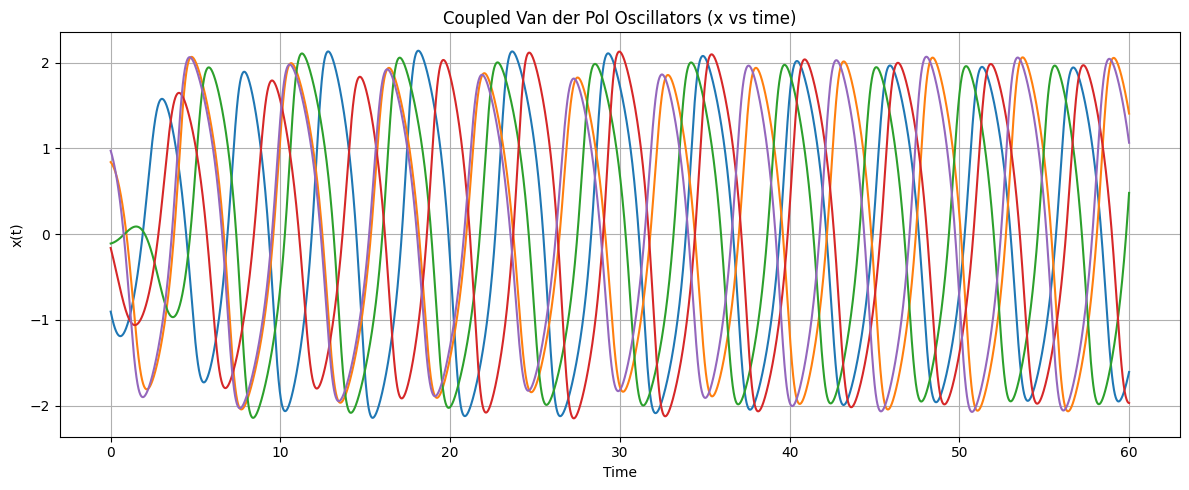

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Simulate a network of N Van der Pol oscillators with weak coupling

N = 5  # number of oscillators
mu = 1.0  # nonlinearity parameter
K = 0.5   # coupling strength
T = 60    # total simulation time
dt = 0.01
t_eval = np.arange(0, T, dt)

# Initial conditions: [x1, y1, x2, y2, ..., xN, yN]
x0 = []
for _ in range(N):
    x0 += list(np.random.uniform(-1, 1, size=2))
x0 = np.array(x0)

# Coupled Van der Pol dynamics
def vdp_network(t, X):
    dX = np.zeros_like(X)
    for i in range(N):
        xi, yi = X[2*i], X[2*i + 1]

        # Local Van der Pol dynamics
        dxi = yi
        dyi = mu * (1 - xi**2) * yi - xi

        # Coupling: sum of differences in x values
        coupling = 0
        for j in range(N):
            if i != j:
                xj = X[2*j]
                coupling += (xj - xi)
        dyi += (K / N) * coupling

        dX[2*i] = dxi
        dX[2*i + 1] = dyi
    return dX

# Solve the ODE
sol = solve_ivp(vdp_network, [0, T], x0, t_eval=t_eval, method='RK45')

# Extract x components for plotting
x_traces = np.zeros((len(t_eval), N))
for i in range(N):
    x_traces[:, i] = sol.y[2*i, :]

# Plot the results
plt.figure(figsize=(12, 5))
for i in range(N):
    plt.plot(t_eval, x_traces[:, i], label=f'Oscillator {i+1}')
plt.title('Coupled Van der Pol Oscillators (x vs time)')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.grid(True)
plt.tight_layout()
plt.show()


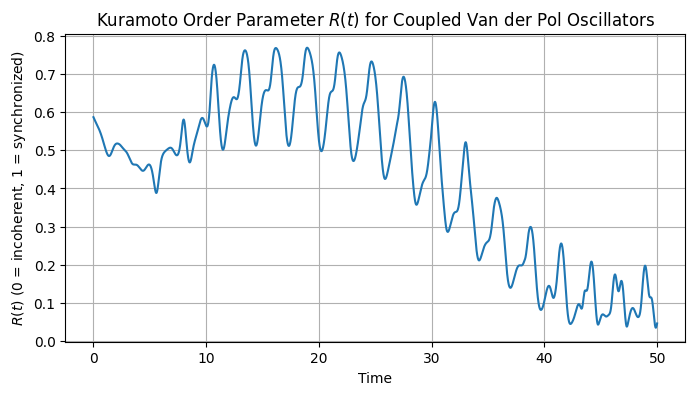

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# --- 1) Parameters ---
N = 4        # number of oscillators
mu = 1.0     # Van der Pol nonlinearity
K = 0.5      # coupling strength
T = 50       # total time
dt = 0.01
t_eval = np.arange(0, T, dt)

# --- 2) Initial condition ---
X0 = np.random.uniform(-1, 1, size=2*N)

# --- 3) Define coupled Van der Pol dynamics ---
def vdp_net(t, X):
    dX = np.zeros_like(X)
    # each oscillator index i has (x_i, y_i)
    for i in range(N):
        xi, yi = X[2*i], X[2*i+1]
        # local VdP
        dxi = yi
        dyi = mu*(1 - xi**2)*yi - xi
        # coupling on x (diffusive)
        diff = sum(X[2*j] - xi for j in range(N) if j != i)
        dyi += (K/N)*diff
        dX[2*i]   = dxi
        dX[2*i+1] = dyi
    return dX

# --- 4) Integrate ODE ---
sol = solve_ivp(vdp_net, [0, T], X0, t_eval=t_eval, method='RK45')

# --- 5) Extract phases θ_i(t) ---
# Using atan2(-y, x) so that on the limit cycle θ increases roughly monotonically
theta = np.zeros((len(t_eval), N))
for idx, t in enumerate(t_eval):
    for i in range(N):
        x_i = sol.y[2*i, idx]
        y_i = sol.y[2*i+1, idx]
        theta[idx, i] = np.arctan2(-y_i, x_i)

# --- 6) Compute R(t) ---
Z = np.exp(1j * theta)
R = np.abs(Z.mean(axis=1))

# --- 7) Plot R(t) ---
plt.figure(figsize=(8, 4))
plt.plot(t_eval, R)
plt.title('Kuramoto Order Parameter $R(t)$ for Coupled Van der Pol Oscillators')
plt.xlabel('Time')
plt.ylabel('$R(t)$ (0 = incoherent, 1 = synchronized)')
plt.grid(True)
plt.show()


## 3. Encoding patterns into coupilng matrix (Linear phase ONN case)

C:\Users\seoyumyum\AppData\Local\Temp\ipykernel_15500\1352935873.py:31: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  coupling = np.sum(K[i, j] * np.sin(theta[t, j] - theta[t, i]) for j in range(N))


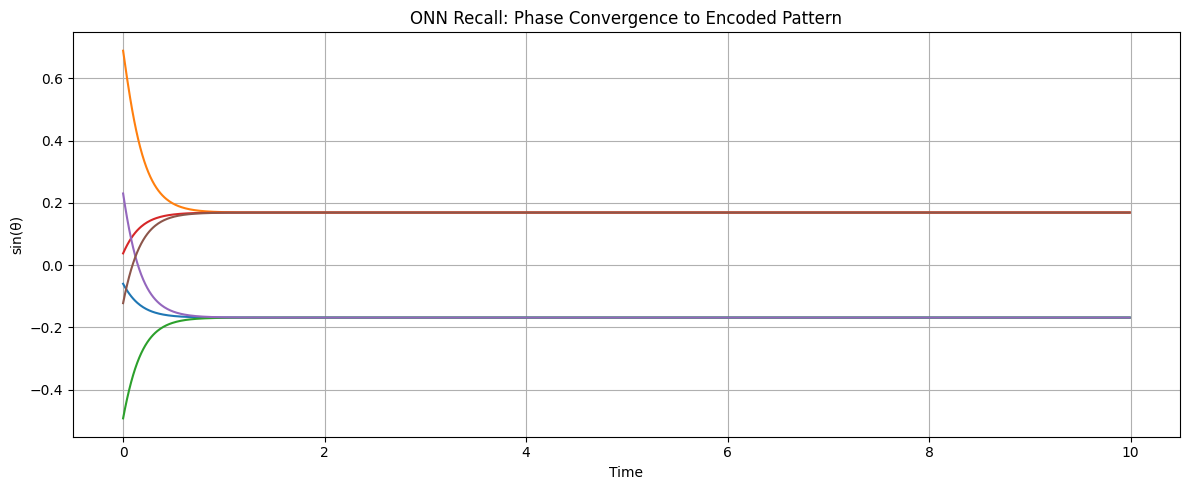

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 6  # number of oscillators (neurons)
T = 10  # total simulation time
dt = 0.01
steps = int(T / dt)

# === Step 1: Define a binary pattern to store ===
# Pattern: [1, -1, 1, -1, 1, -1] → Phases: [0, π, 0, π, 0, π]
pattern = np.array([1, -1, 1, -1, 1, -1])
theta_pattern = np.where(pattern == 1, 0, np.pi)

# === Step 2: Create coupling matrix using cosine Hebbian rule ===
K = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        if i != j:
            K[i, j] = np.cos(theta_pattern[i] - theta_pattern[j])  # 1 if in-phase, -1 if anti-phase

# === Step 3: Initialize phases (perturbed version of stored pattern) ===
theta = np.zeros((steps, N))
initial_perturbation = 0.3 * np.random.randn(N)  # small noise
theta[0] = theta_pattern + initial_perturbation

# === Step 4: Simulate Kuramoto dynamics with learned coupling ===
for t in range(steps - 1):
    dtheta = np.zeros(N)
    for i in range(N):
        coupling = np.sum(K[i, j] * np.sin(theta[t, j] - theta[t, i]) for j in range(N))
        dtheta[i] = coupling
    theta[t + 1] = theta[t] + dt * dtheta

# === Step 5: Plot the phase evolution (sin(θ) for interpretability) ===
signals = np.sin(theta)

plt.figure(figsize=(12, 5))
for i in range(N):
    plt.plot(np.arange(steps) * dt, signals[:, i], label=f'Oscillator {i+1}')
plt.title('ONN Recall: Phase Convergence to Encoded Pattern')
plt.xlabel('Time')
plt.ylabel('sin(θ)')
plt.grid(True)
plt.tight_layout()
plt.show()
